In [13]:
# import Numpy, Pandas, Matplotlib, Sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn

In [14]:
x = np.array([[1,2,3], [4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
eye = np.eye(4)
eye

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [20]:
from scipy import sparse
sparse_matrix = sparse.csr_matrix(eye)
print(sparse_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


###Note 1.
**np.ones(x)** : 길이가 x이면서 값이 1인 배열  
**np.arange(x)** : 길이가 x이면서 값이 0~(x-1)인 배열 

In [34]:
data = np.ones(4)
print(data)
row_indices = np.arange(4)
print(row_indices)
col_indices = np.arange(4)
print(col_indices)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print(eye_coo)

[1. 1. 1. 1.]
[0 1 2 3]
[0 1 2 3]
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### Note 2.
**np.linspace(x, y, d)** : 초항 a, 막항 b, 길이 d인 등차수열 배열  
**plt.plot(x, y)** : (x, y) 값을 이은 그래프 표시

[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


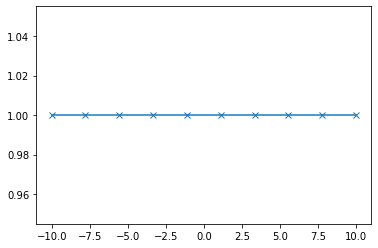

In [36]:
x = np.linspace(-10,10,10)
print(x)
y = np.sin(x)*np.sin(x)+np.cos(x)*np.cos(x)
print(y)
plt.plot(x,y,marker="x")

### Note 3.
**pd.DataFrame(X)** : 배열 X를 DataFrame 형식으로 변경  
DataFrame으로 쿼리, 조인 등 SQL 기능 수행이 가능

In [41]:
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location': ["New York", "Paris", "Berlin", "London"],
        'Age': [24, 13, 53, 33]
        }
data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [58]:
display(data_pandas[data_pandas.Age > 30])
str_expr = "Age > 20"
# display(data_pandas.query(Age > 20))  Error!
display(data_pandas.query(str_expr))

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


,Name,Location,Age
0,John,New York,24
2,Peter,Berlin,53
3,Linda,London,33


### Note 4.
40페이지부터 시작